In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# Load CSV file containing file paths and class labels
label_df = pd.read_csv('D:\\Semester 7\\FYP\\Preprocessing\\labels.csv', delimiter='\t')

# Split the combined column name into separate columns
label_df[['path', 'class']] = label_df['path,class'].str.split(',', expand=True)

# Check the column names in the DataFrame after splitting
print(label_df.columns)

# Load ECG data from CSV files mentioned in the label_df
ecg_data = []
labels = []
for index, row in label_df.iterrows():
    file_path = row['path']
    label = row['class']
    ecg_df = pd.read_csv(file_path)  # Assuming CSV format for ECG data
    ecg_data.append(ecg_df.values)
    labels.append(label)

Index(['path,class', 'path', 'class'], dtype='object')


In [4]:
# Convert lists to NumPy arrays
ecg_data = np.array(ecg_data)
labels_encoded = LabelEncoder().fit_transform(labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(ecg_data, labels_encoded, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 266s 10s/step - accuracy: 0.0011 - loss: -30.0054 - val_accuracy: 0.0000e+00 - val_loss: -54.7374
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 262s 11s/step - accuracy: 2.5324e-04 - loss: -68.7570 - val_accuracy: 0.0000e+00 - val_loss: -95.8777
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 276s 11s/step - accuracy: 7.2656e-04 - loss: -111.2733 - val_accuracy: 0.0000e+00 - val_loss: -127.2190
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 289s 12s/step - accuracy: 0.0021 - loss: -140.8795 - val_accuracy: 0.0000e+00 - val_loss: -157.7023
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 290s 12s/step - accuracy: 0.0021 - loss: -172.6279 - val_accuracy: 0.0000e+00 - val_loss: -189.0399
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 272s 11s/step - accuracy: 0.0028 - loss: -208.8980 - val_accuracy: 0.0000e+00 - val_loss: -219.5005
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 326s 13s/step - accuracy: 0.0024 - loss: -243.6377 - val_accuracy: 0.0000e+00 - val_loss: -249.6903
Epoch 8/10
25/25 ━━━━━━━━━━━━━

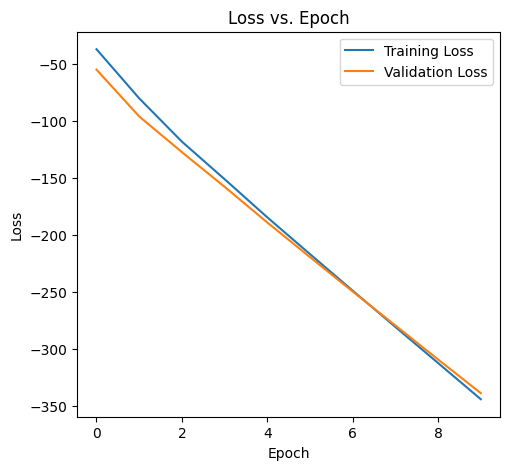

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Plot the loss and accuracy graphs
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()

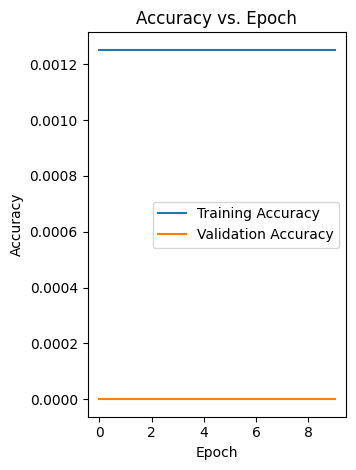

In [7]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()

plt.tight_layout()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step


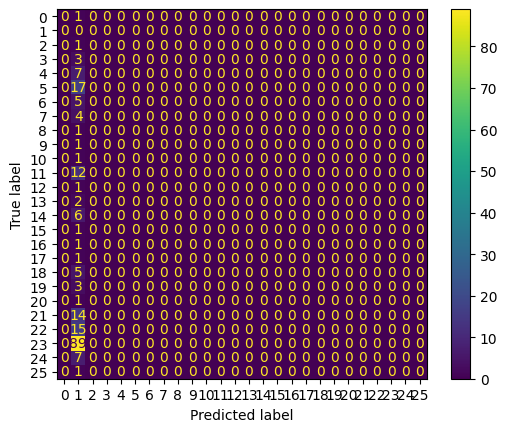

In [10]:
# Import for creating the confusion matrix plot
from sklearn.metrics import ConfusionMatrixDisplay
y_pred_proba = model.predict(X_val) 

# Apply threshold to get class labels 
y_pred = (y_pred_proba > 0.5).astype('int32')

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_val, y_pred)



# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.show()
